In [82]:
import numpy as np
import pygad
import tree_representation
import csv
import matplotlib.pyplot as plt
import pickle

In [83]:
xs, ys, target = None, None, None

In [84]:
def fitness_func(ga_instance, solution, solution_idx):
  tree = tree_representation.fromIntArray(solution)
  fit = tree_representation.fitness(tree, xs, ys)
  return fit

def crossover_func(parents, offspring_size, ga_instance):
  offspring = []
  t1, t2 = tree_representation.fromIntArray(parents[0]), tree_representation.fromIntArray(parents[1])
  
  while len(offspring) != offspring_size[0]:
    child, _ = tree_representation.crossover_tree(t1, t2)

    try:
      offspring.append(tree_representation.toIntArray(child))
    except IndexError:
      print("Not crossovering")
    
  return np.array(offspring)

def mutation_func(offspring, ga_instance):
  new_offspring = []

  for t_numerical in offspring:
    t = tree_representation.fromIntArray(t_numerical)
    
    if (np.random.rand() < ga_instance.mutation_probability):
      t = tree_representation.mutate_tree(t)
    new_offspring.append(tree_representation.toIntArray(t))

  return np.array(new_offspring)

In [85]:
def predict_function(index):
    initial_population = [tree_representation.toIntArray(tree_representation.generate_random_tree()) for _ in range(5000)]

    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=2,
                        initial_population=initial_population,
                        fitness_func=fitness_func,
                        keep_elitism=10,
                        crossover_type=crossover_func,
                        mutation_type=mutation_func,
                        gene_type=np.int8,
                        mutation_probability=1,
                        stop_criteria="saturate_10",
                        parallel_processing=20
                        )

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    return tree_representation.fromIntArray(solution), solution_fitness

In [87]:
best_models = [(-float("inf"), None, None) for _ in range(100)]
tree_representation.Node.ENABLE_EXTRA_OPERATORS = False

equation_indices = range(2, 100) 
skip_indices = [36, 40]

with open("dataset.csv") as file:
    reader = csv.reader(file)

    index = 1
    for row in reader:
        print("processing " + str(index))
        target = row[0]

        xs = np.fromstring(row[1][1:-1], sep=", ")
        ys = np.fromstring(row[2][1:-1], sep=", ")

        if index in skip_indices:
            index += 1
            continue

        if index in equation_indices:
            best_model, best_fitness = predict_function(index)
            if best_fitness > best_models[index][0]:
                best_models[index] = (best_fitness, best_model, target)
        index += 1


# save best models to file
with open('best_models.pkl', 'wb') as file:
    pickle.dump(best_models, file)


processing 1
processing 2
processing 3
processing 4
processing 5
processing 6
processing 7
processing 8
processing 9
processing 10
processing 11
processing 12
processing 13
processing 14
processing 15
processing 16
processing 17
processing 18
processing 19
processing 20
processing 21
processing 22
processing 23
processing 24
processing 25
processing 26
processing 27
processing 28
processing 29
processing 30
processing 31
processing 32
processing 33
processing 34
processing 35
processing 36
processing 37
processing 38
processing 39
processing 40


invalid value encountered in scalar subtract
Traceback (most recent call last):
  File "c:\Users\Domen\IS\Inteligentni-sistemi\Inteligentni-sistemi\.venv\lib\site-packages\pygad\pygad.py", line 2143, in run
    if (self.best_solutions_fitness[self.generations_completed - criterion[1]] - self.best_solutions_fitness[self.generations_completed - 1]) == 0:


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
# load predictions from file
with open('best_models.pkl', 'rb') as file:
    best_models = pickle.load(file)

In [ ]:
def graph_predictions(best_models):
    with open("dataset.csv") as file:
        reader = csv.reader(file)

        index = 1
        for row in reader:
            target = row[0]

            xs = np.fromstring(row[1][1:-1], sep=", ")
            ys = np.fromstring(row[2][1:-1], sep=", ")
            fitness, model, target = best_models[index]
            
            if model != None:
                print("Target: ", target)
                print("Best solution", model)
                print("Best fitness", fitness)

                plt.title(f"Index: {index}")
                plt.plot(xs, ys, color='green')
                plt.plot(xs, [model.evaluate(x) for x in xs], color='blue')
                plt.show()
            
            index += 1

Target:  ((x ** 4) - 6)
Best solution + ^ x 4.00 / 6.00 ^ -1.00 9.00
Best fitness -0.0009000000000000001


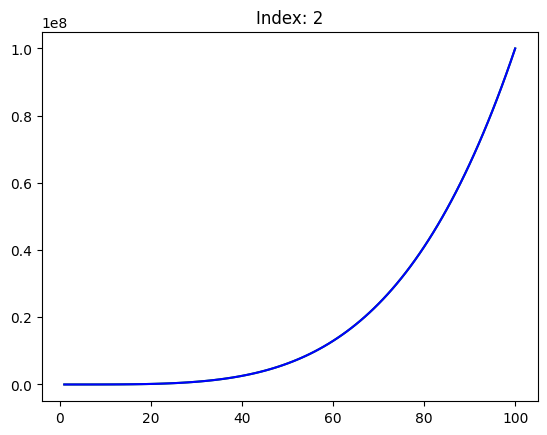

Target:  (((x / 8) * 2) + 1)
Best solution / - + - / -3.00 x -10.00 * + / / ^ / + ^ -2.00 -9.00 -4.00 1.00 2.00 -2.00 + 7.00 / -8.00 5.00 - -9.00 - -1.00 * x -4.00 -1.00 * / x + 9.00 + 6.00 4.00 -9.00 * + -9.00 ^ 0.00 5.00 -2.00
Best fitness -0.14291218169991404


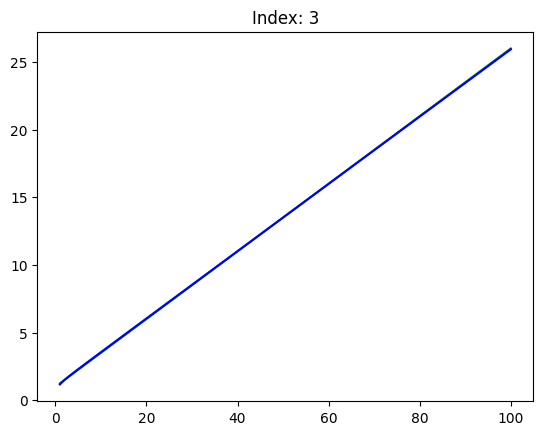

In [ ]:
graph_predictions(best_models=best_models)